In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df=pd.read_excel('food categories.xls')
df

,,.1,(0812010)冷凍冷藏肉類 (公噸),(0812070)肉類罐頭 (箱),(0812090)其他肉類加工食品 (千元),(0820010)冷凍冷藏水產食品 (公噸),(0820050)水產品罐頭 (箱),(0820090)其他水產加工食品 (千元),(0830010)豆類加工食品 (千元),(0830100)蔬果罐頭 (箱),...,(0891030)蛋糕西點 (千元),(0891090)其他烘焙炊蒸食品 (千元),(0892010)麵粉條類食品 (公噸),(0892030)速食麵粉條類食品 (千箱),(0897010)膳食罐頭 (箱),(0897090)其他膳食及菜餚 (公噸),(0898000)保健營養食品 (千元),(0899010)食用冰製品 (千元),(0899920)冷藏餐食 (千元),(0899991)未分類其他食品 (千元)
0,NaN,NaN,冷凍冷藏肉類 (公噸),肉類罐頭 (箱),其他肉類加工食品 (千元),冷凍冷藏水產食品 (公噸),水產品罐頭 (箱),其他水產加工食品 (千元),豆類加工食品 (千元),蔬果罐頭 (箱),...,蛋糕西點 (千元),其他烘焙炊蒸食品 (千元),麵粉條類食品 (公噸),速食麵粉條類食品 (千箱),膳食罐頭 (箱),其他膳食及菜餚 (公噸),保健營養食品 (千元),食用冰製品 (千元),冷藏餐食 (千元),未分類其他食品 (千元)
1,107年,1月,39651,36870,1597180,11089,156681,862872,750686,380676,...,1157804,2363957,12714,4824,383991,24587,2322803,125018,1182361,4199151
2,,2月,30442,38904,1493573,7779,102267,659345,608722,320262,...,899400,1663881,9179,3463,255033,21366,1557389,131692,1189977,3519549
3,,3月,37802,31693,1213732,11258,128371,472384,728304,305984,...,1086074,1746740,10087,3788,350111,19034,1884688,222289,1249810,3944553
4,,4月,35413,21776,1124732,8887,129860,308900,721994,271900,...,989182,1582973,9724,3459,271721,16702,1565620,246535,1258879,3507912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,,8月,52927,45194,1870412,18564,205937,712896,1452725,440744,...,1417505,2974612,13391,5201,616880,26963,2587875,547173,2449488,6924742
81,,9月,48400,24841,1683276,16140,171523,629179,1409389,465365,...,1530058,2490067,11844,3411,493527,25641,2822265,486976,2476120,6522313
82,,10月,52903,28792,1663770,16388,156977,600962,1452066,300682,...,1429586,2628208,12352,4576,273429,30135,2548306,432561,2551204,7121609
83,,11月,51405,22656,1656395,16437,150573,752757,1337983,317702,...,1407275,2826912,11366,3994,270685,30708,2858158,376847,2393244,6787700


In [5]:
df.columns = df.iloc[0]   # 第一列當欄位名
df = df[1:]
df = df.reset_index(drop=True)

#設置新的時間欄
df['時間'] = pd.date_range("2018-01", periods=len(df), freq="M")
df['時間_顯示'] = df['時間'].dt.strftime('%Y-%m')

In [7]:
#刪掉前兩欄用不到的年月
cols_to_drop = df.columns[[0, 2]]
df = df.drop(columns=cols_to_drop)

In [9]:
#列出所有欄位,將最後一欄的時間往前排
cols = df.columns.tolist()
print(cols)

['肉類罐頭 (箱)', '其他肉類加工食品 (千元)', '冷凍冷藏水產食品 (公噸)', '水產品罐頭 (箱)', '其他水產加工食品 (千元)', '豆類加工食品 (千元)', '蔬果罐頭 (箱)', '冷凍冷藏蔬果 (公噸)', '其他蔬果加工及保藏食品 (千元)', '餅乾 (公噸)', '麵包 (千元)', '蛋糕西點 (千元)', '其他烘焙炊蒸食品 (千元)', '麵粉條類食品 (公噸)', '速食麵粉條類食品 (千箱)', '膳食罐頭 (箱)', '其他膳食及菜餚 (公噸)', '保健營養食品 (千元)', '食用冰製品 (千元)', '冷藏餐食 (千元)', '未分類其他食品 (千元)', '時間', '時間_顯示']


In [11]:
new_order = [cols[-1]] + cols[:-1] # 最後一個放到前面方便看時間,保留datetime格式在最後面預留之後ETL使用
df = df[new_order]                 # 永久改掉欄位順序
df.head()

,時間_顯示,肉類罐頭 (箱),其他肉類加工食品 (千元),冷凍冷藏水產食品 (公噸),水產品罐頭 (箱),其他水產加工食品 (千元),豆類加工食品 (千元),蔬果罐頭 (箱),冷凍冷藏蔬果 (公噸),其他蔬果加工及保藏食品 (千元),...,其他烘焙炊蒸食品 (千元),麵粉條類食品 (公噸),速食麵粉條類食品 (千箱),膳食罐頭 (箱),其他膳食及菜餚 (公噸),保健營養食品 (千元),食用冰製品 (千元),冷藏餐食 (千元),未分類其他食品 (千元),時間
0,2018-01,36870,1597180,11089,156681,862872,750686,380676,4093,1058916,...,2363957,12714,4824,383991,24587,2322803,125018,1182361,4199151,2018-01-31
1,2018-02,38904,1493573,7779,102267,659345,608722,320262,3877,668244,...,1663881,9179,3463,255033,21366,1557389,131692,1189977,3519549,2018-02-28
2,2018-03,31693,1213732,11258,128371,472384,728304,305984,6581,665662,...,1746740,10087,3788,350111,19034,1884688,222289,1249810,3944553,2018-03-31
3,2018-04,21776,1124732,8887,129860,308900,721994,271900,4501,498673,...,1582973,9724,3459,271721,16702,1565620,246535,1258879,3507912,2018-04-30
4,2018-05,53709,1213495,10679,181317,513277,854457,297553,5350,597753,...,1710553,10257,3646,364795,17683,1754597,334804,1357055,3801530,2018-05-31


In [13]:
#修改資料屬性
convert_to_int = df.columns[1:22]
df[convert_to_int]=df[convert_to_int].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   時間_顯示             84 non-null     object        
 1   肉類罐頭 (箱)          84 non-null     int32         
 2   其他肉類加工食品 (千元)     84 non-null     int32         
 3   冷凍冷藏水產食品 (公噸)     84 non-null     int32         
 4   水產品罐頭 (箱)         84 non-null     int32         
 5   其他水產加工食品 (千元)     84 non-null     int32         
 6   豆類加工食品 (千元)       84 non-null     int32         
 7   蔬果罐頭 (箱)          84 non-null     int32         
 8   冷凍冷藏蔬果 (公噸)       84 non-null     int32         
 9   其他蔬果加工及保藏食品 (千元)  84 non-null     int32         
 10  餅乾 (公噸)           84 non-null     int32         
 11  麵包 (千元)           84 non-null     int32         
 12  蛋糕西點 (千元)         84 non-null     int32         
 13  其他烘焙炊蒸食品 (千元)     84 non-null     int32         
 14  麵粉條類食品 (公噸)       84 non-nul

In [17]:
df.describe()

,肉類罐頭 (箱),其他肉類加工食品 (千元),冷凍冷藏水產食品 (公噸),水產品罐頭 (箱),其他水產加工食品 (千元),豆類加工食品 (千元),蔬果罐頭 (箱),冷凍冷藏蔬果 (公噸),其他蔬果加工及保藏食品 (千元),餅乾 (公噸),...,其他烘焙炊蒸食品 (千元),麵粉條類食品 (公噸),速食麵粉條類食品 (千箱),膳食罐頭 (箱),其他膳食及菜餚 (公噸),保健營養食品 (千元),食用冰製品 (千元),冷藏餐食 (千元),未分類其他食品 (千元),時間
count,84.000000,8.400000e+01,84.000000,84.000000,8.400000e+01,8.400000e+01,84.000000,84.000000,8.400000e+01,84.000000,...,8.400000e+01,84.000000,84.000000,84.000000,84.000000,8.400000e+01,84.000000,8.400000e+01,8.400000e+01,84
mean,39147.785714,1.496320e+06,12599.880952,164400.714286,6.840471e+05,1.026557e+06,363582.238095,5405.440476,9.745734e+05,5221.261905,...,2.196800e+06,11382.285714,4213.154762,390741.023810,25567.988095,2.395162e+06,329083.726190,1.750941e+06,5.420411e+06,2021-07-15 18:00:00
min,14307.000000,1.099265e+06,7779.000000,86043.000000,3.089000e+05,6.087220e+05,180163.000000,3545.000000,4.986730e+05,2696.000000,...,1.408549e+06,7147.000000,2851.000000,209343.000000,16702.000000,1.305323e+06,125018.000000,1.182361e+06,3.465049e+06,2018-01-31 00:00:00
25%,25744.750000,1.297318e+06,11078.250000,127536.500000,5.544998e+05,8.803682e+05,282691.000000,4727.500000,8.147970e+05,4690.000000,...,1.874040e+06,10231.250000,3618.000000,298413.250000,22476.750000,2.065798e+06,222226.750000,1.453912e+06,4.628158e+06,2019-10-23 06:00:00
50%,35930.000000,1.487602e+06,12234.500000,152320.500000,6.559130e+05,1.019168e+06,350144.500000,5352.000000,9.366495e+05,5220.000000,...,2.204626e+06,11414.500000,3976.000000,353582.500000,25109.000000,2.443340e+06,326554.000000,1.662450e+06,5.205481e+06,2021-07-15 12:00:00
75%,46733.250000,1.661342e+06,14167.250000,184130.000000,7.745308e+05,1.135518e+06,439750.250000,6094.500000,1.063626e+06,5827.750000,...,2.473427e+06,12355.750000,4691.750000,483102.750000,27941.750000,2.721012e+06,425971.750000,2.040045e+06,6.385389e+06,2023-04-07 12:00:00
max,100821.000000,2.211931e+06,18564.000000,309522.000000,1.329676e+06,1.475245e+06,586412.000000,7459.000000,1.756650e+06,7535.000000,...,3.435286e+06,14564.000000,6407.000000,656000.000000,35783.000000,3.418872e+06,587712.000000,2.551204e+06,7.872689e+06,2024-12-31 00:00:00
std,17919.730643,2.516080e+05,2319.206950,50256.550588,1.889417e+05,1.986069e+05,94287.031577,923.983132,2.508135e+05,871.106845,...,4.247391e+05,1504.367950,853.229252,113813.404553,4391.481841,4.502110e+05,116957.827554,3.662066e+05,1.086599e+06,NaN


In [19]:
#資料標準化,因各項數值差異大,使用最大最小值處理
cols_to_nor=df.columns[1:22]
df_std = df.copy()
df_std[cols_to_nor] = (df[cols_to_nor]-df[cols_to_nor].min()) / (df[cols_to_nor].max()-df[cols_to_nor].min())
df_std=df_std.round(2)
df_std.head(3)

,時間_顯示,肉類罐頭 (箱),其他肉類加工食品 (千元),冷凍冷藏水產食品 (公噸),水產品罐頭 (箱),其他水產加工食品 (千元),豆類加工食品 (千元),蔬果罐頭 (箱),冷凍冷藏蔬果 (公噸),其他蔬果加工及保藏食品 (千元),...,其他烘焙炊蒸食品 (千元),麵粉條類食品 (公噸),速食麵粉條類食品 (千箱),膳食罐頭 (箱),其他膳食及菜餚 (公噸),保健營養食品 (千元),食用冰製品 (千元),冷藏餐食 (千元),未分類其他食品 (千元),時間
0,2018-01,0.26,0.45,0.31,0.32,0.54,0.16,0.49,0.14,0.45,...,0.47,0.75,0.55,0.39,0.41,0.48,0.00,0.00,0.17,2018-01-31
1,2018-02,0.28,0.35,0.00,0.07,0.34,0.00,0.34,0.08,0.13,...,0.13,0.27,0.17,0.10,0.24,0.12,0.01,0.01,0.01,2018-02-28
2,2018-03,0.20,0.10,0.32,0.19,0.16,0.14,0.31,0.78,0.13,...,0.17,0.40,0.26,0.32,0.12,0.27,0.21,0.05,0.11,2018-03-31


#### 因每項數值計算單位不同,所以僅就趨勢變化探討,不比較各產品種類多寡

In [21]:
#以標準差觀察波動幅度
num_cols=df_std.columns[1:22]
stds = df_std[num_cols].std().sort_values(ascending=False)
print("各項目標準差（波動幅度）：")
print(stds)

各項目標準差（波動幅度）：
0
冷藏餐食 (千元)           0.267904
膳食罐頭 (箱)            0.254894
食用冰製品 (千元)          0.252854
未分類其他食品 (千元)        0.246392
速食麵粉條類食品 (千箱)       0.240044
冷凍冷藏蔬果 (公噸)         0.236391
蔬果罐頭 (箱)            0.232126
其他膳食及菜餚 (公噸)        0.230224
豆類加工食品 (千元)         0.229277
其他肉類加工食品 (千元)       0.226289
水產品罐頭 (箱)           0.225051
蛋糕西點 (千元)           0.222583
麵包 (千元)             0.221251
冷凍冷藏水產食品 (公噸)       0.214888
保健營養食品 (千元)         0.213113
其他烘焙炊蒸食品 (千元)       0.209488
肉類罐頭 (箱)            0.207105
麵粉條類食品 (公噸)         0.202563
其他蔬果加工及保藏食品 (千元)    0.199472
其他水產加工食品 (千元)       0.185180
餅乾 (公噸)             0.179700
dtype: float64


In [23]:
df_std.to_csv('cleaned.csv', index=False, encoding='utf-8-sig')
#儲存一個經過處理的檔案

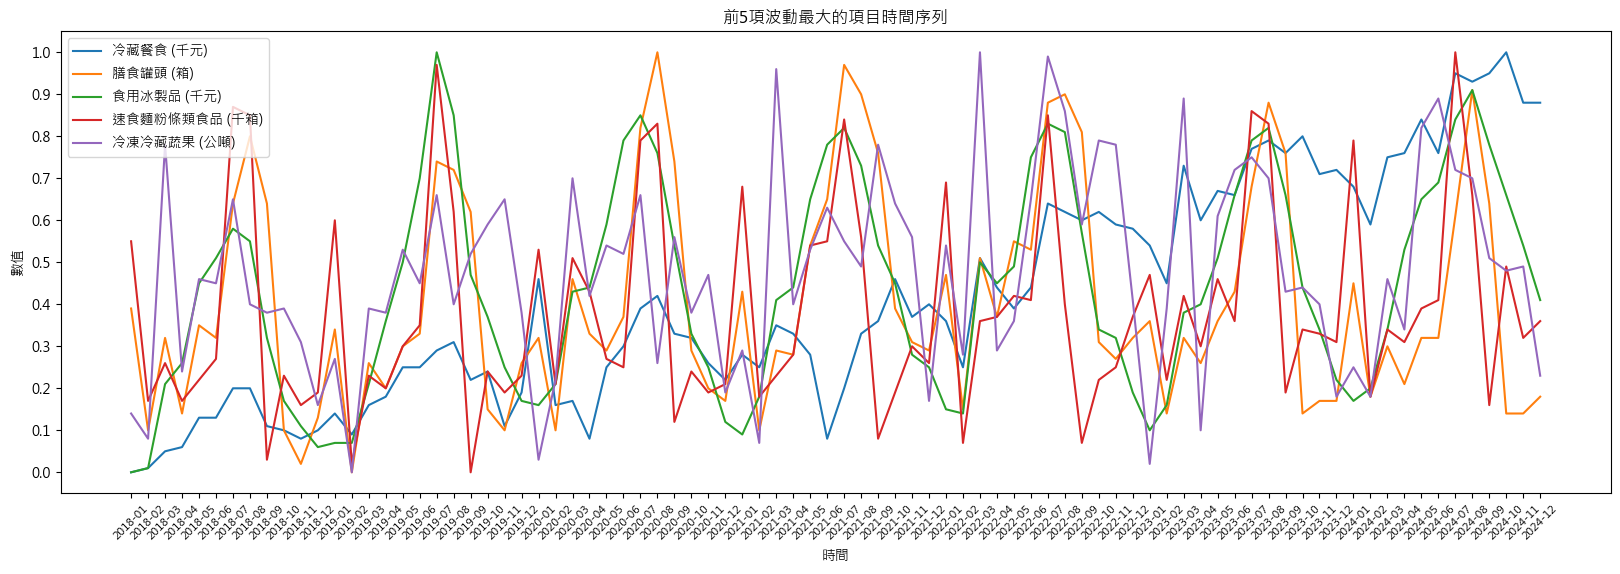

In [25]:
#選擇標準差最大的前5項(跳過未分類食品)

#設定中文字型
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
rcParams['axes.unicode_minus'] = False  

top_std=['冷藏餐食 (千元)','膳食罐頭 (箱)','食用冰製品 (千元)','速食麵粉條類食品 (千箱)','冷凍冷藏蔬果 (公噸)']

plt.figure(figsize=(20,6))
for s in top_std:
    plt.plot(df_std['時間_顯示'], df_std[s], label=s)
plt.legend()
plt.xlabel('時間')
plt.xticks(rotation=45,fontsize=8)
plt.ylabel('數值')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title(f'前5項波動最大的項目時間序列')

plt.show()

冷藏膳食有逐年提升的趨勢,但因是用千元統計,需考慮通膨因素;食用冰製品受季節性影響(夏季銷量特別好)

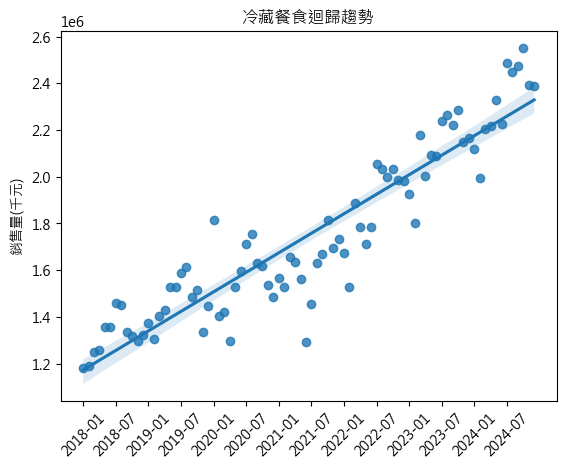

In [36]:
sns.regplot(x=list(range(len(df))), y=df['冷藏餐食 (千元)'])
plt.xticks(
    ticks=range(0, len(df), 6),
    labels=df['時間_顯示'][::6],
    rotation=45
)
plt.ylabel('銷售量(千元)')
plt.title('冷藏餐食迴歸趨勢')
plt.show()


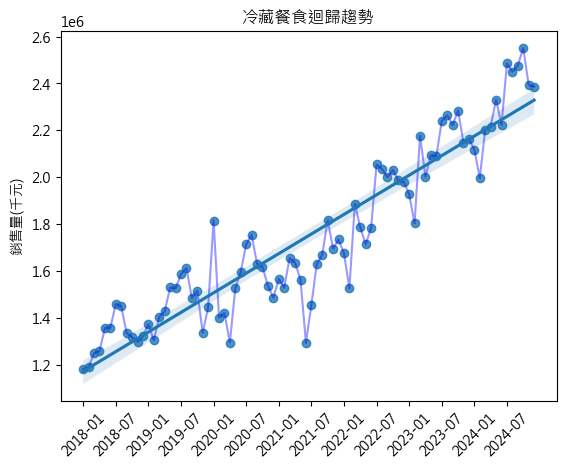

In [38]:
sns.lineplot(x=list(range(len(df))), y=df['冷藏餐食 (千元)'], data=df, color='blue', alpha=0.4)
sns.regplot(x=list(range(len(df))), y=df['冷藏餐食 (千元)'])
plt.xticks(
    ticks=range(0, len(df), 6),
    labels=df['時間_顯示'][::6],
    rotation=45
)
plt.ylabel('銷售量(千元)')
plt.title('冷藏餐食迴歸趨勢')
plt.show()

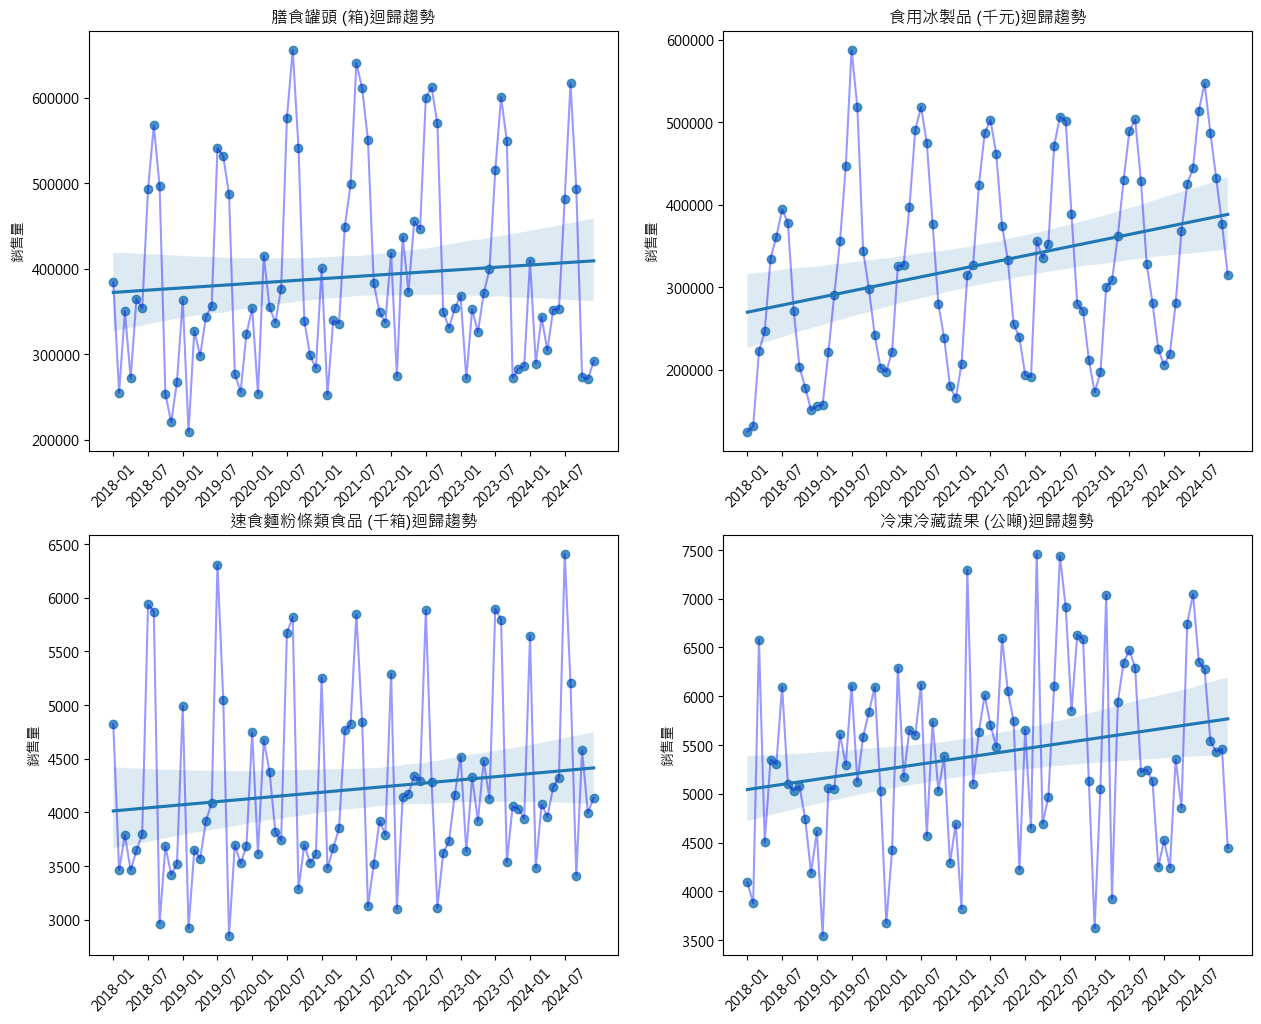

In [50]:
plt.figure(figsize=(15,12))
_four_std=['膳食罐頭 (箱)','食用冰製品 (千元)','速食麵粉條類食品 (千箱)','冷凍冷藏蔬果 (公噸)']

for i, col in enumerate(_four_std, 1):
    plt.subplot(2,2,i)
    sns.lineplot(x=list(range(len(df))), y=df[col], data=df, color='blue', alpha=0.4)
    sns.regplot(x=list(range(len(df))), y=df[col])
    plt.xticks(
    ticks=range(0, len(df), 6),
    labels=df['時間_顯示'][::6],
    rotation=45
    )
    plt.ylabel('銷售量')
    plt.title(col+'迴歸趨勢')

plt.show()

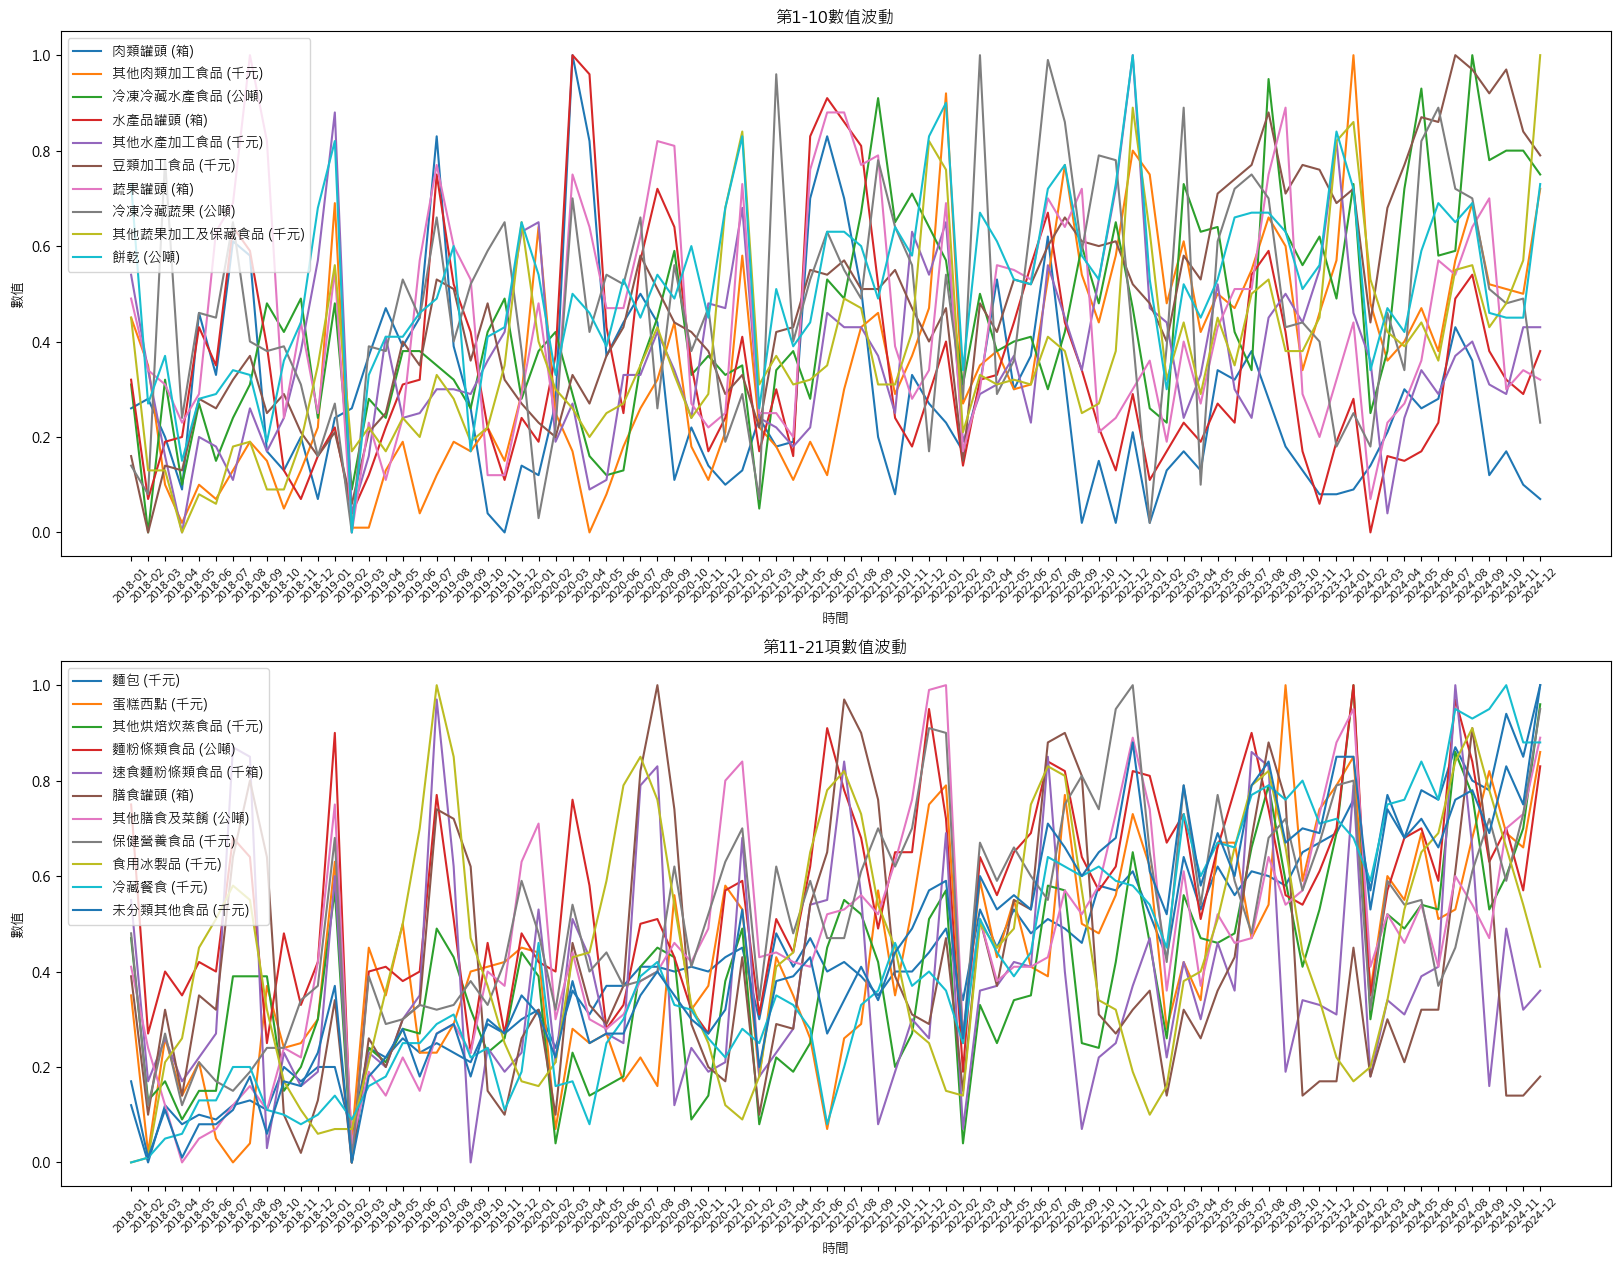

In [30]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
num_cols_1=df.columns[1:11]
for s in num_cols_1:
    plt.plot(df_std['時間_顯示'], df_std[s], label=s)
plt.legend()
plt.xlabel('時間')
plt.ylabel('數值')
plt.title(f'第1-10數值波動')
plt.xticks(rotation=45,fontsize=8)

plt.subplot(2,1,2)
num_cols_2=df.columns[11:22]
for s in num_cols_2:
    plt.plot(df_std['時間_顯示'], df_std[s], label=s)
plt.legend()
plt.xlabel('時間')
plt.ylabel('數值')
plt.title(f'第11-21項數值波動')
plt.xticks(rotation=45,fontsize=8)

plt.show()

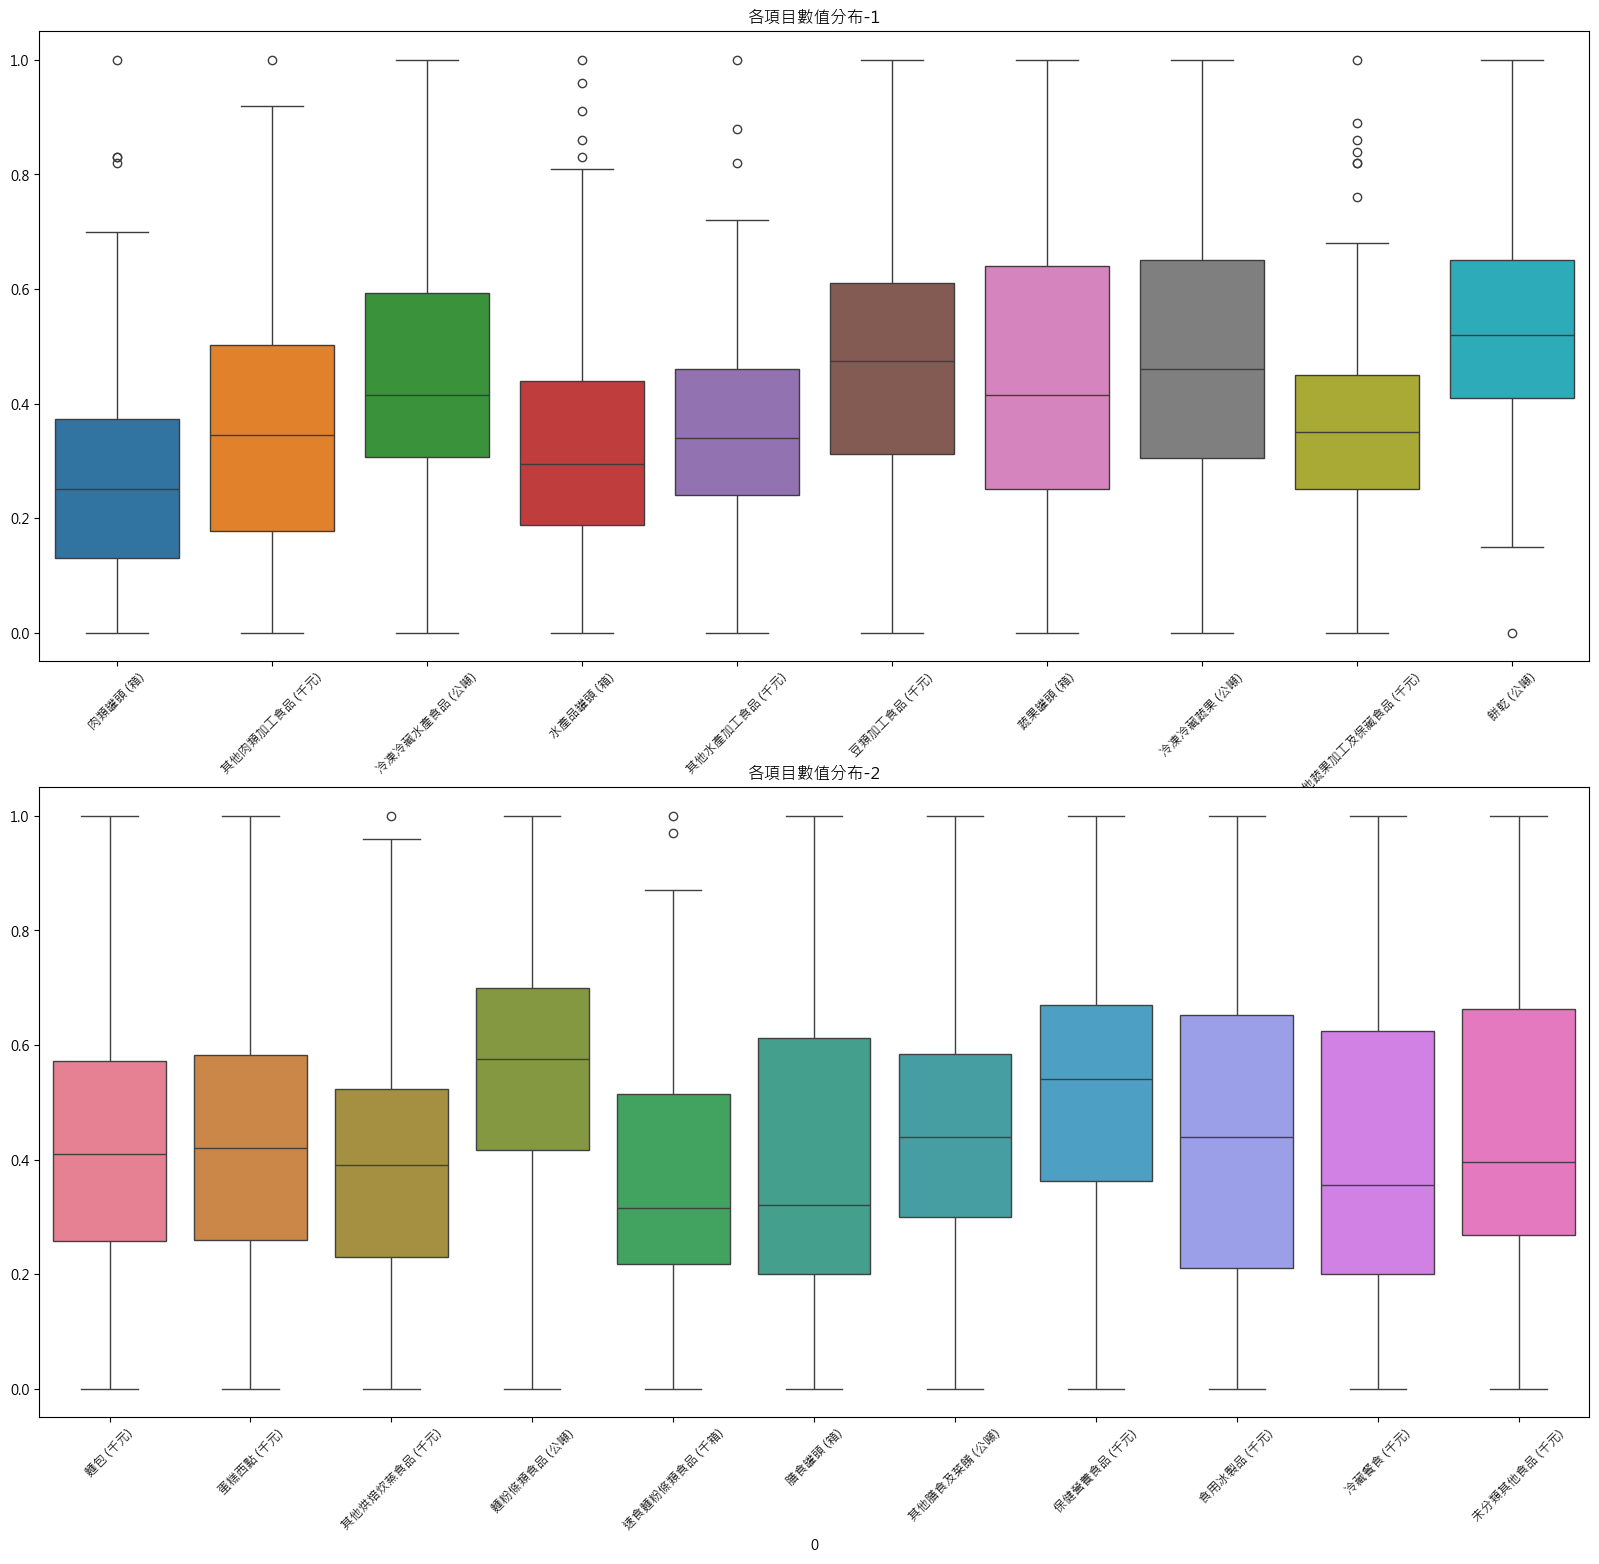

In [31]:
#箱型圖-看每個項目的分布和變異

plt.figure(figsize=(20,18))
plt.subplot(2,1,1)
sns.boxplot(data=df_std.iloc[:,1:11])
plt.xticks(rotation=45,fontsize=9)
plt.title('各項目數值分布-1')

plt.subplot(2,1,2)
sns.boxplot(data=df_std.iloc[:,11:22])
plt.xticks(rotation=45,fontsize=9)
plt.title('各項目數值分布-2')


plt.show()


肉類罐頭 (箱),水產品罐頭 (箱),其他水產加工食品 (千元),其他蔬果加工及保藏食品 (千元) 這四項有較多的outlier,進一步分析

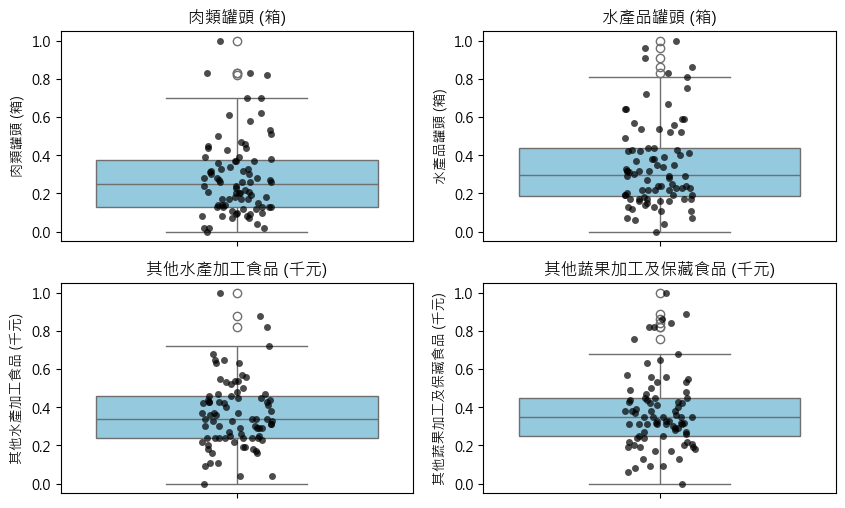

In [34]:
plt.figure(figsize=(10,6))

_four_outlier=['肉類罐頭 (箱)','水產品罐頭 (箱)','其他水產加工食品 (千元)','其他蔬果加工及保藏食品 (千元)']

for i, col in enumerate(_four_outlier, 1):
    plt.subplot(2, 2, i)  # 2x2 子圖
    sns.boxplot(y=df_std[col], color='skyblue')
    sns.stripplot(y=df_std[col], color='black', jitter=True, alpha=0.7)
    plt.title(col)


plt.show()


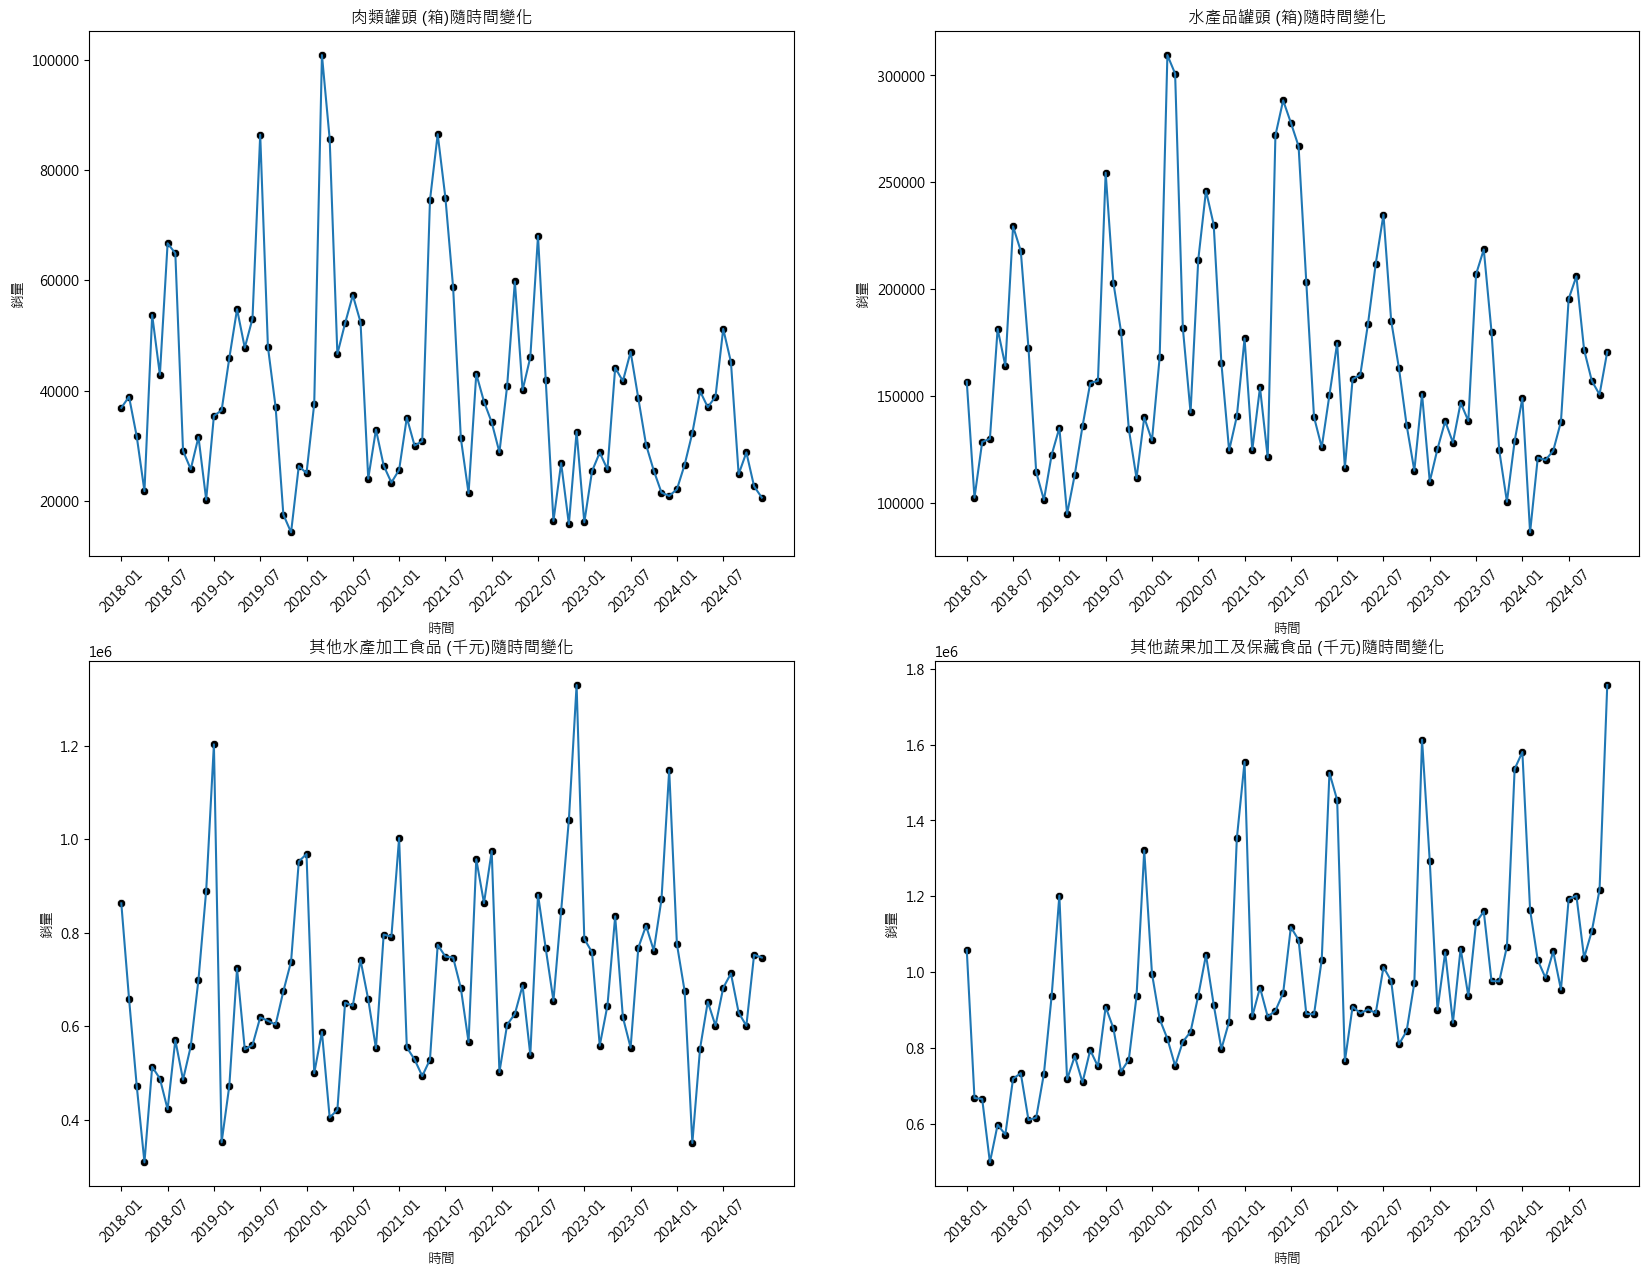

In [36]:
plt.figure(figsize=(20,15))

for i, col in enumerate(_four_outlier, 1):
    plt.subplot(2,2,i)
    sns.lineplot(x='時間_顯示', y=col, data=df)# 折線圖顯示趨勢
    sns.scatterplot(x='時間_顯示', y=col, data=df, color='black') # 疊上每筆資料點
    plt.xticks(ticks=range(0, len(df), 6),
    labels=df['時間_顯示'][::6],rotation=45)
    plt.xlabel('時間')
    plt.ylabel('銷量')
    plt.title(col+'隨時間變化')
plt.show()

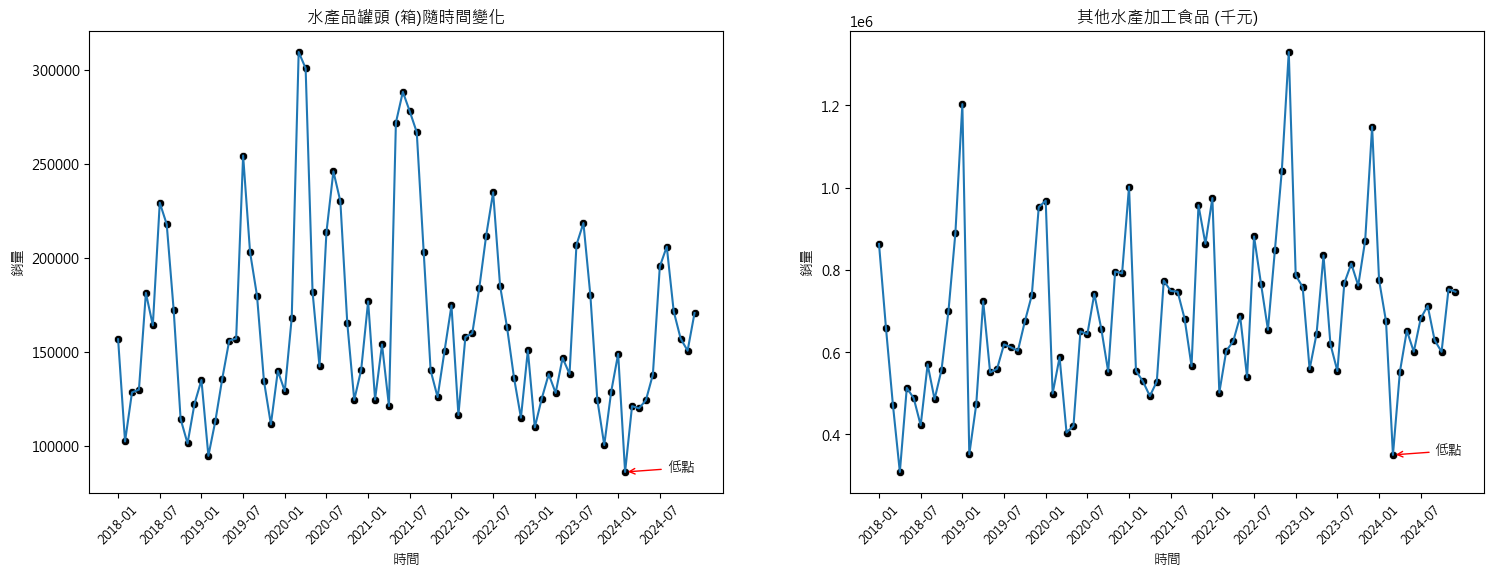

In [51]:
#標示低點
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
x = df['時間_顯示']
y = df['水產品罐頭 (箱)']
sns.lineplot(x=x, y=y)
sns.scatterplot(x=x,y=y, color='black')
plt.xticks(ticks=range(0, len(df), 6),
labels=df['時間_顯示'][::6],rotation=45,fontsize=9)

plt.annotate(
    '低點',
    xy=(x.iloc[-11], y.iloc[-11]),
    xytext=(30, 0),  # 偏移量
    textcoords='offset points',
    arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->')
)

plt.xlabel('時間')
plt.ylabel('銷量')
plt.title('水產品罐頭 (箱)隨時間變化')


plt.subplot(1,2,2)
x = df['時間_顯示']
y = df['其他水產加工食品 (千元)']
sns.lineplot(x=x, y=y)
sns.scatterplot(x=x,y=y, color='black')
plt.xticks(ticks=range(0, len(df), 6),
labels=df['時間_顯示'][::6],rotation=45,fontsize=9)

plt.annotate(
    '低點',
    xy=(x.iloc[-10], y.iloc[-10]),
    xytext=(30, 0),  # 偏移量
    textcoords='offset points',
    arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->')
)

plt.xlabel('時間')
plt.ylabel('銷量')
plt.title('其他水產加工食品 (千元)')

plt.show()